###### IMPORTING LIBRARIES

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [24]:
data=pd.read_csv('dataset/RTA Dataset.csv')

In [26]:
print(data.head(10))

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level   
0  17:02:00      Monday              18-30          Male   Above high school  \
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   
5  14:15:00      Friday              31-50          Male                 NaN   
6  17:30:00   Wednesday              18-30          Male  Junior high school   
7  17:20:00      Friday              18-30          Male  Junior high school   
8  17:20:00      Friday              18-30          Male  Junior high school   
9  17:20:00      Friday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle   
0                Employee              1-2yr      

In [4]:
print(data.columns)

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [6]:
for i in data.columns:
    print(f"Unique value in {i}:")
    print(data[i].unique(),'\n')

Unique value in Age_band_of_driver:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique value in Sex_of_driver:
['Male' 'Female' 'Unknown'] 

Unique value in Educational_level:
['Above high school' 'Junior high school' 'Unknown' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading'] 

Unique value in Vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' 'Other'] 

Unique value in Driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'Unknown' 'No Licence' 'Below 1yr'
 'unknown'] 

Unique value in Lanes_or_Medians:
['Unknown' 'Undivided Two way' 'other' 'Double carriageway (median)'
 'One way' 'Two-way (divided with solid lines road marking)'
 'Two-way (divided with broken lines road marking)'] 

Unique value in Types_of_Junction:
['No junction' 'Y Shape' 'Crossing' 'O Shape' 'Other' 'Unknown' 'T Shape'
 'X Shape'] 

Unique value in Road_surface_type:
['Asphalt roads' 'Earth roads' 'Unknown'
 'Asphalt roads with some distress' 'Gravel roads' 'Other'] 

Unique v

Text(0, 0.5, 'Light_conditions')

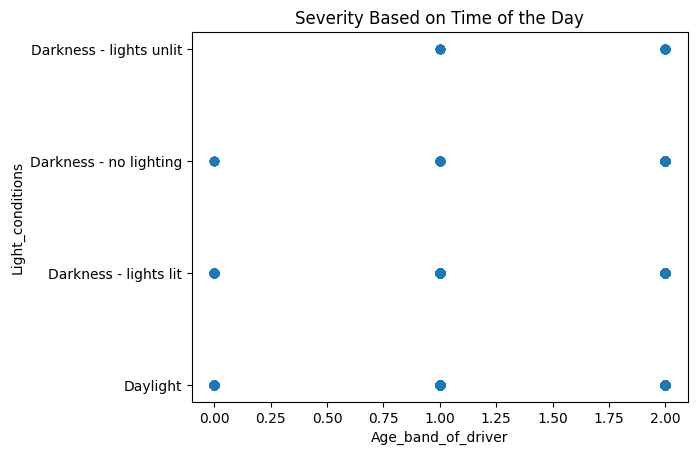

In [5]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the Accident_severity against the Light_conditions
ax.scatter(data['Accident_severity'], data['Light_conditions'])

# set a title and labels
ax.set_title('Severity Based on Time of the Day')
ax.set_xlabel('Age_band_of_driver')
ax.set_ylabel('Light_conditions')

In [6]:
print(data["Accident_severity"].value_counts())

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64


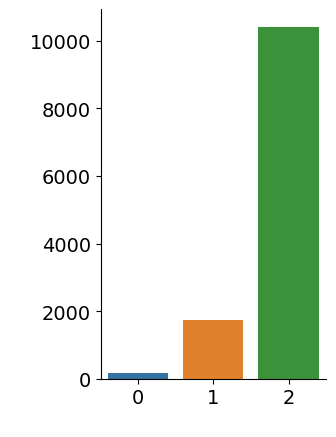

In [5]:
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=data["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

In [ ]:
for columns in data.columns:
    print(f"{columns} - {data[columns].nunique()}")

Age_band_of_driver - 5
Sex_of_driver - 3
Educational_level - 7
Vehicle_driver_relation - 4
Driving_experience - 8
Lanes_or_Medians - 7
Types_of_Junction - 8
Road_surface_type - 6
Light_conditions - 4
Weather_conditions - 9
Type_of_collision - 10
Vehicle_movement - 13
Pedestrian_movement - 9
Cause_of_accident - 20
Accident_severity - 3


Text(0, 0.5, 'count')

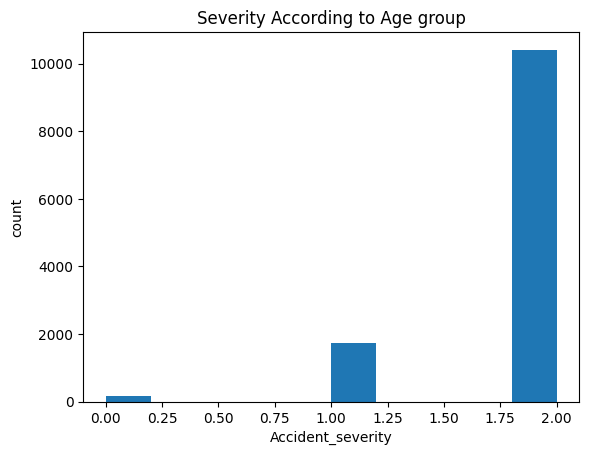

In [ ]:
# create figure and axis
fig, ax = plt.subplots()

# plot histogram
ax.hist(data['Accident_severity'])

# set title and labels
ax.set_title('Severity According to Age group')
ax.set_xlabel('Accident_severity')
ax.set_ylabel("count")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [18]:
'''col_map={
    'Time': 'time'}
data.rename(columns=col_map, inplace=True)'''

"col_map={\n    'Time': 'time'}\ndata.rename(columns=col_map, inplace=True)"

In [27]:
# converting 'time' to datetime
data['Time'] = pd.to_datetime(data['Time'])

# date (day-month-year) time
data["Time"].dt.hour

# extracting hour and minute from timestamp
data['hour'] = data['Time'].dt.hour
data['minute'] = data['Time'].dt.minute
data.drop('Time', axis=1, inplace=True)

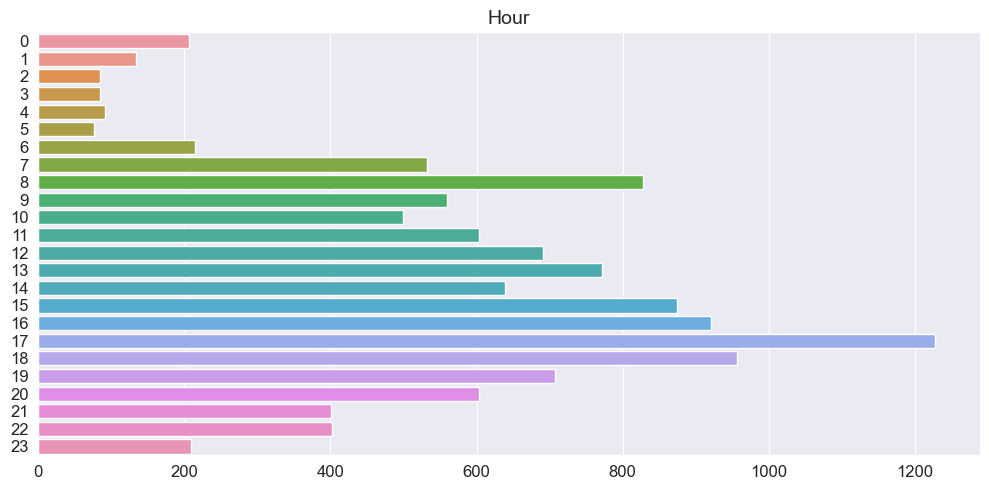

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()